In [19]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.metrics import classification_report

from tqdm import tnrange, tqdm_notebook
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.utils import shuffle

In [3]:
data = pd.read_csv("\\A_Z Handwritten Data.csv").astype('float32')

In [4]:
data.head() # 28 x 28 pixels. So each row is for a particular character with 784 pixels

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = data.drop('0',axis = 1) # pixel data for each alphabet
y = data['0'] # alphabet data (in integer from 0 - 25)

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [7]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

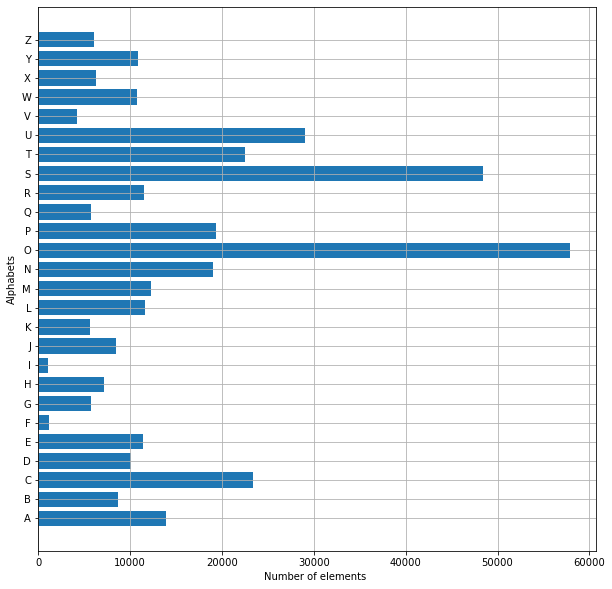

In [8]:
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

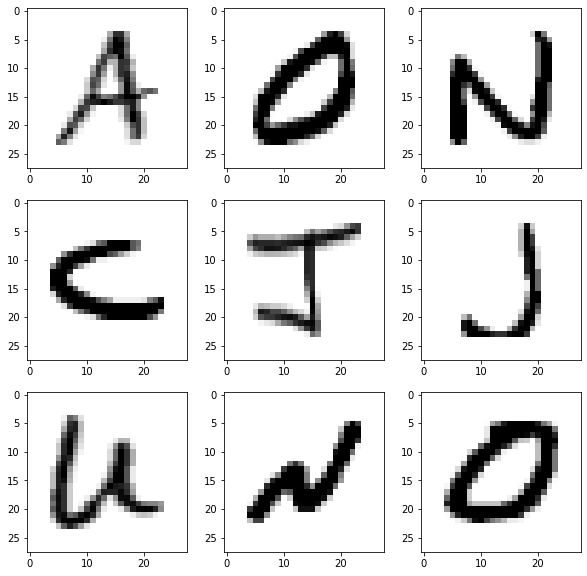

In [9]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="gray_r")
    
plt.show()

In [10]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of X train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of X test data: ", test_X.shape)

New shape of X train data:  (297960, 28, 28, 1)
New shape of X test data:  (74490, 28, 28, 1)


In [11]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

tqdm_callback = tfa.callbacks.TQDMProgressBar()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history = model.fit(train_X, train_yOHE, validation_split=0.05, epochs=3, callbacks=[reduce_lr, early_stop, tqdm_callback]).history


model.summary()
model.save(r'mnist_character.h5')

Epoch 1/3
Epoch 1/3


8846/8846 [==============================] - 353s 35ms/step - loss: 0.3894 - accuracy: 0.9131 - val_loss: 0.0778 - val_accuracy: 0.9776

Epoch 2/3
Epoch 2/3


8846/8846 [==============================] - 300s 34ms/step - loss: 0.0739 - accuracy: 0.9793 - val_loss: 0.0627 - val_accuracy: 0.9831

Epoch 3/3
Epoch 3/3


8846/8846 [==============================] - 303s 34ms/step - loss: 0.0593 - accuracy: 0.9836 - val_loss: 0.0637 - val_accuracy: 0.9836


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)    

In [14]:
print("The validation accuracy is :", history['val_accuracy'])
print("The training accuracy is :", history['accuracy'])
print("The validation loss is :", history['val_loss'])
print("The training loss is :", history['loss'])

The validation accuracy is : [0.9776480197906494, 0.9830849766731262, 0.9835548400878906]
The training accuracy is : [0.9570200443267822, 0.9798100590705872, 0.9834135174751282]
The validation loss is : [0.07776357233524323, 0.06268404424190521, 0.06370097398757935]
The training loss is : [0.1618099808692932, 0.07237038016319275, 0.06024383381009102]


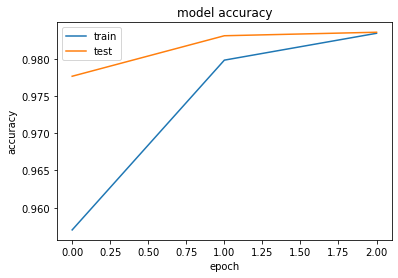

In [15]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

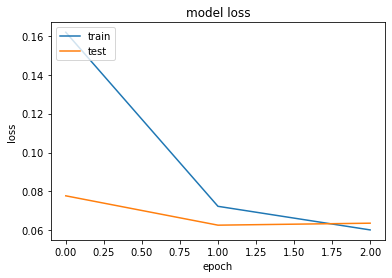

In [16]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

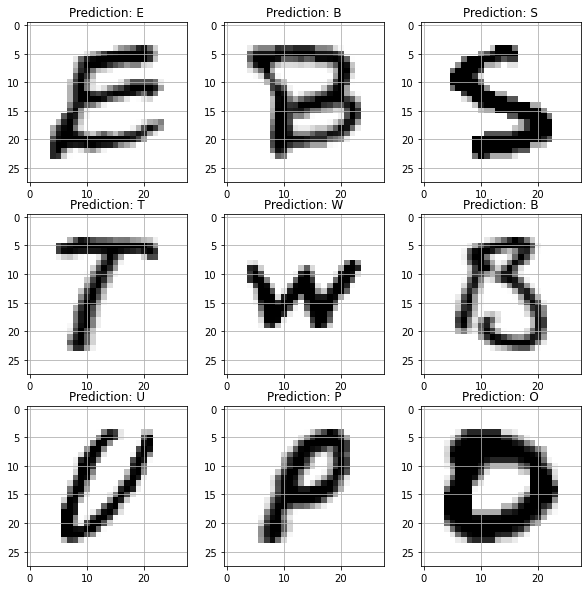

In [18]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="gray_r")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: " + pred)
    ax.grid()

In [20]:
predictions = model.predict_classes(test_X)

C:\Users\koppu\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
test_X.shape

(74490, 28, 28, 1)

In [35]:
predictions

array([ 4,  1, 18, ...,  4, 24, 11], dtype=int64)

In [23]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2790
         1.0       0.99      0.97      0.98      1714
         2.0       0.99      0.98      0.99      4745
         3.0       0.97      0.93      0.95      2061
         4.0       0.98      0.99      0.99      2287
         5.0       0.99      0.95      0.97       218
         6.0       0.98      0.95      0.96      1129
         7.0       0.97      0.93      0.95      1471
         8.0       0.96      0.98      0.97       213
         9.0       0.98      0.97      0.98      1693
        10.0       0.97      0.97      0.97      1121
        11.0       0.97      0.98      0.98      2287
        12.0       0.98      0.99      0.99      2496
        13.0       0.96      0.99      0.97      3807
        14.0       0.98      0.99      0.99     11595
        15.0       0.99      0.99      0.99      3769
        16.0       0.98      0.95      0.96      1125
        17.0       0.96    

In [97]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, ImageOps
import numpy as np
import warnings
warnings.filterwarnings('ignore')

model = load_model('mnist_character.h5')

def predict_char(img):
    
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    
    #convert rgb to grayscale
    img = img.convert('L')
    img = ImageOps.invert(img)
    img = np.array(img)
    
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    
    #predicting the class
    res = model.predict_classes(img)
    
    pred_img = model.predict(img)
    
    pred_char = word_dict[np.argmax(pred_img)]
    pred_prob = np.max(pred_img)*100
        
    return pred_char, pred_prob

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        
        a,b,c,d = rect
        rect=(a+4,b+4,c+100,d+100)
        
        im = ImageGrab.grab(rect)

        character, pred_accuracy = predict_char(im)
        self.label.configure(text= str(character) + ' : ' + str(int(pred_accuracy))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()